<a href="https://colab.research.google.com/github/SondiSohan/EV-MARKET-STARTUP/blob/main/evms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               Age         Income  Vehicle_Ownership  Vehicle_Usage  \
count  5000.000000    5000.000000        5000.000000    5000.000000   
mean     43.292000   84768.423000           0.705800      26.809000   
std      14.889079   37531.913172           0.455728      12.902659   
min      18.000000   20015.000000           0.000000       5.000000   
25%      31.000000   52297.250000           0.000000      16.000000   
50%      43.000000   84575.000000           1.000000      27.000000   
75%      56.000000  116950.500000           1.000000      38.000000   
max      69.000000  149979.000000           1.000000      49.000000   

       EV_Market_Share  Charging_Stations_Available  
count      5000.000000                  5000.000000  
mean          0.301320                    49.370600  
std           0.115714                    28.703387  
min           0.100081                     0.000000  
25%           0.201952                    25.000000  
50%           0.300665              

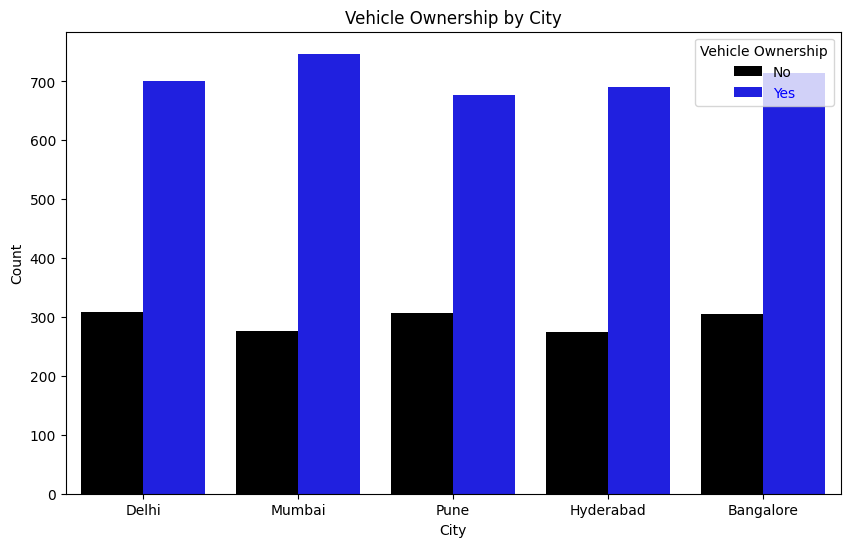

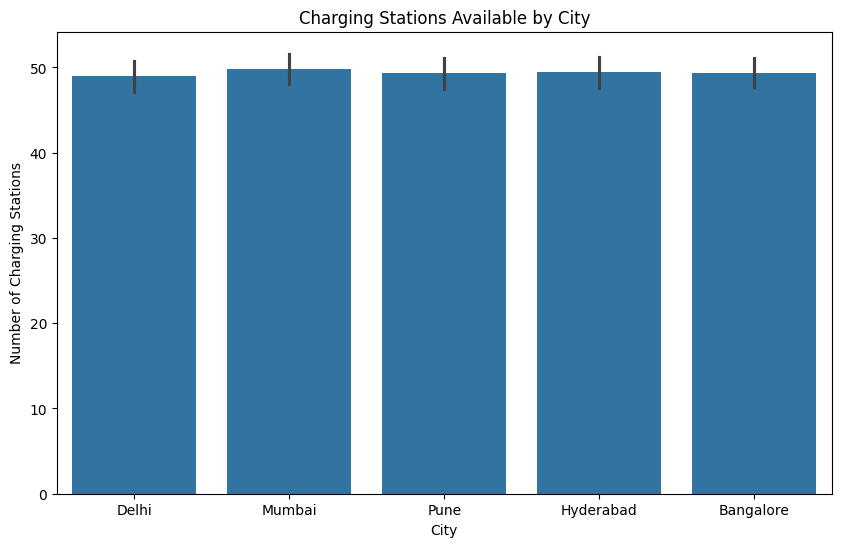

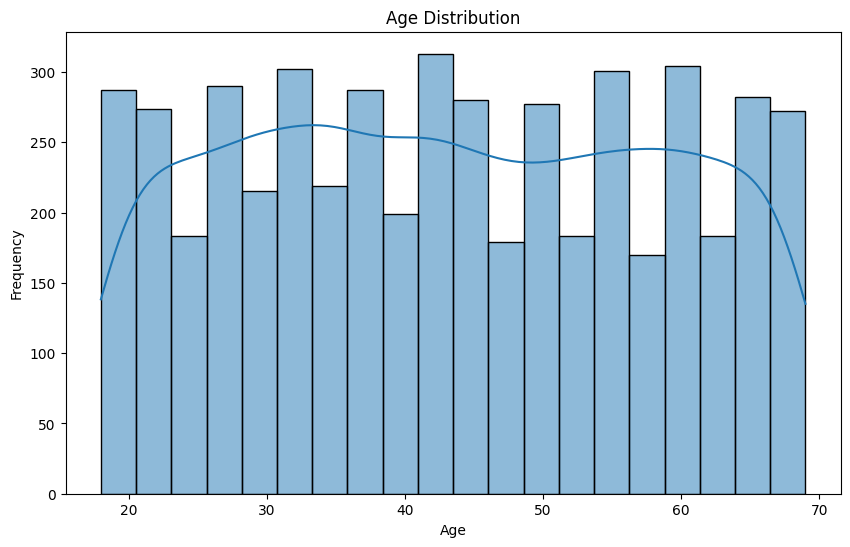

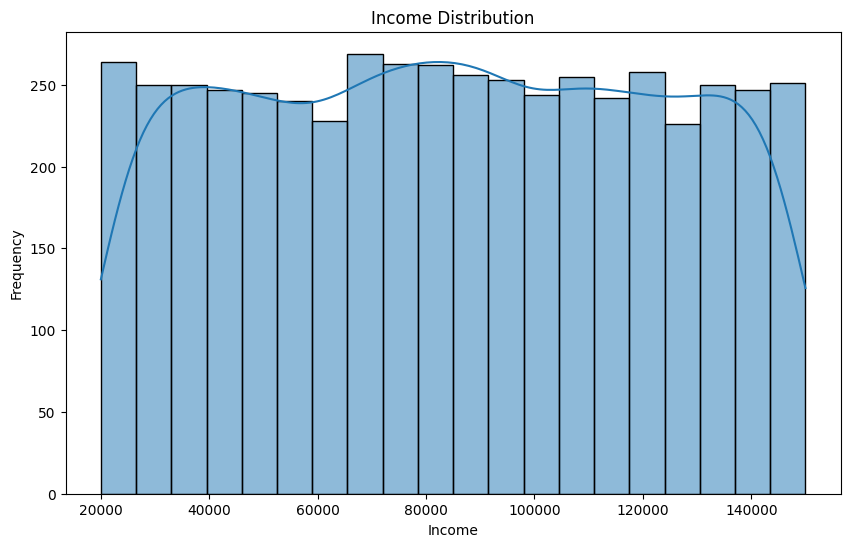

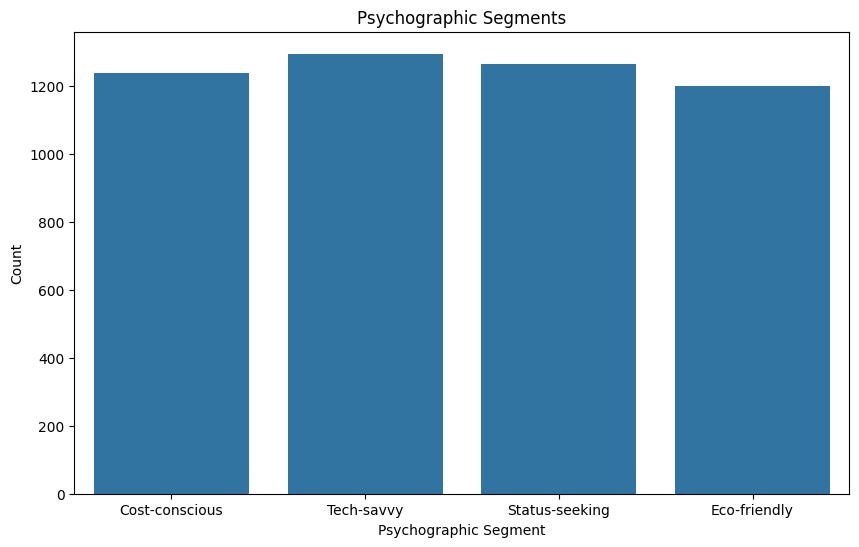

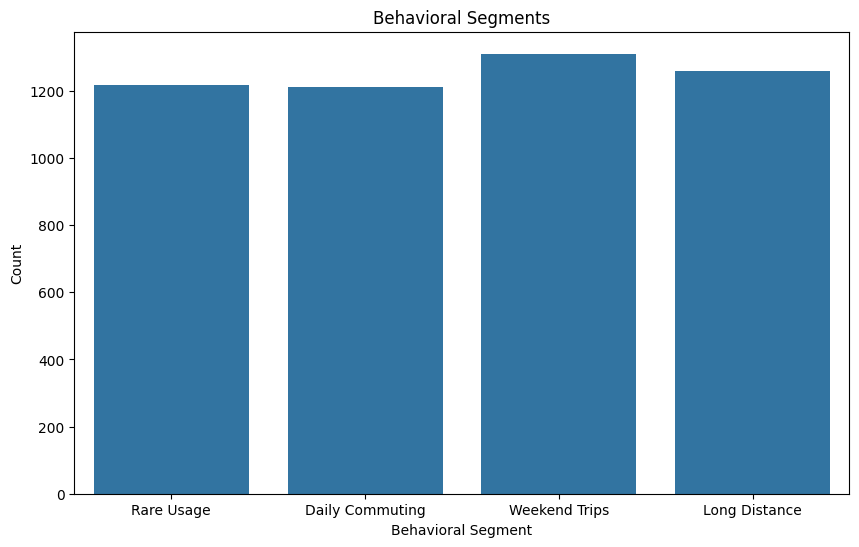

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     City  Age  Income  Vehicle_Ownership  Vehicle_Usage Vehicle_Type  \
0   Delhi   47   27446                  0             36    4-wheeler   
1  Mumbai   40  139304                  0             37    4-wheeler   
2    Pune   33   24725                  0             17    2-wheeler   
3  Mumbai   31  105597                  1             31   E-rickshaw   
4  Mumbai   27  133073                  1             22   E-rickshaw   

   EV_Market_Share  Charging_Stations_Available   Psychographic  \
0         0.366079                           88  Cost-conscious   
1         0.474826                           80      Tech-savvy   
2         0.438903                           69  Status-seeking   
3         0.198302                           13  Status-seeking   
4         0.329050                           39  Cost-conscious   

        Behavioral  Segment  
0       Rare Usage        0  
1  Daily Commuting        1  
2  Daily Commuting        0  
3    Weekend Trips        2  
4    Lon

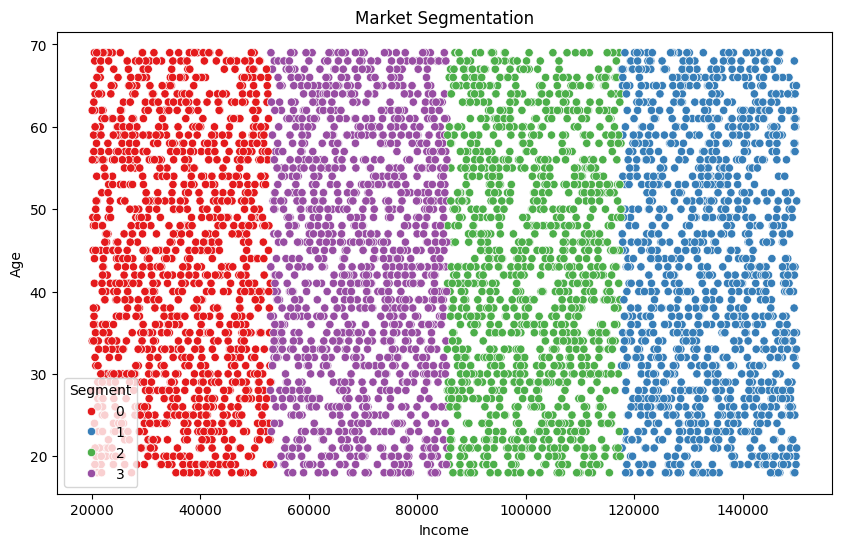

               Age         Income  Vehicle_Ownership  Vehicle_Usage  \
Segment                                                               
0        43.179386   36156.486231           0.687648      27.063729   
1        43.146580  133925.095277           0.694625      26.263029   
2        43.084553  101425.086992           0.728455      26.843902   
3        43.745869   69767.385523           0.712825      27.047994   

         EV_Market_Share  Charging_Stations_Available  
Segment                                                
0               0.303718                    48.766326  
1               0.302518                    49.399837  
2               0.297624                    50.572358  
3               0.301340                    48.783635  


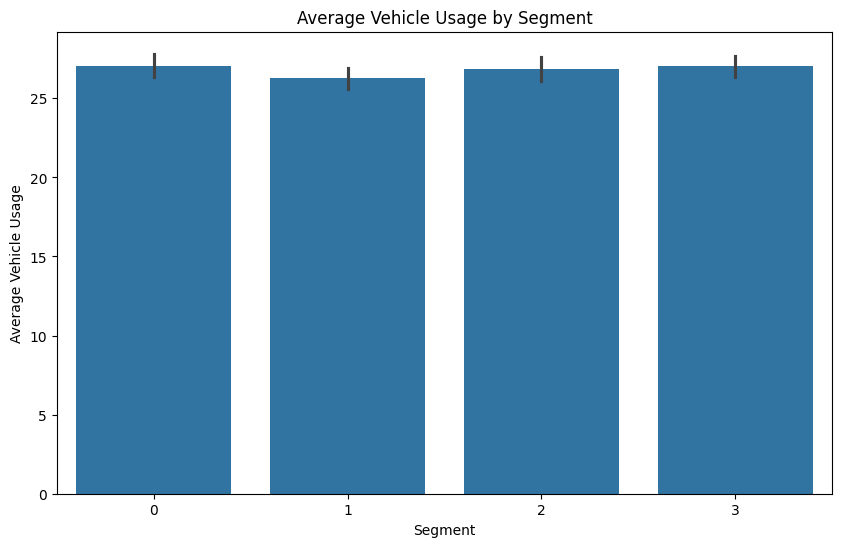

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# read the file

df = pd.read_csv('/content/large_synthetic_dataset.csv')

# Summary statistics
summary = df.describe()
print(summary)

# Geographic Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='City', hue='Vehicle_Ownership', data=df, palette={0: "black", 1: "blue"})  # Black and blue palette
plt.title('Vehicle Ownership by City')
plt.xlabel('City')
plt.ylabel('Count')
legend_handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=legend_handles, title='Vehicle Ownership', labels=['No', 'Yes'], labelcolor=['black', 'blue'])  # Black and blue legend labels
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Charging_Stations_Available', data=df)
plt.title('Charging Stations Available by City')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.show()

# Demographic Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Psychographic Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Psychographic', data=df)
plt.title('Psychographic Segments')
plt.xlabel('Psychographic Segment')
plt.ylabel('Count')
plt.show()

# Behavioral Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Behavioral', data=df)
plt.title('Behavioral Segments')
plt.xlabel('Behavioral Segment')
plt.ylabel('Count')
plt.show()

# Market Segmentation using K-Means Clustering
features = df[['Age', 'Income', 'Vehicle_Usage', 'Charging_Stations_Available']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(features)

# Display the first few rows with segments
print(df.head())

# Visualization of Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Age', hue='Segment', data=df, palette='Set1')
plt.title('Market Segmentation')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

# Summary statistics by segment - selecting only numeric columns
segment_summary = df.groupby('Segment').mean(numeric_only=True) # Calculate mean only for numeric columns
print(segment_summary)

# Visualization of Average Vehicle Usage by Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Vehicle_Usage', data=df)
plt.title('Average Vehicle Usage by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Vehicle Usage')
plt.show()
